# Importing Libraries

In this step, we installed and imported the below libraries:-
1. kaggle - To pull data from Kaggle API 
2. pandas, numpy, seaborn, & matplotlib - For Data Cleaning, Transformation and EDA
3. sqlachemy & pymysql - To push data from python into MySql database 

In [ ]:
#Installing Libraries
!pip install kaggle pandas numpy seaborn matplotlib sqlalchemy pymysql


In [2]:
#Importing Libraries
import kaggle
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql 
from sqlalchemy import create_engine
from datetime import time 

# Extracting Data From Kaggle

In this step, we extracted data directly from Kaggle API and loaded it using pandas DataFrame.

In [3]:
# Download data from Kaggle
!kaggle datasets download vidhikadubey/retail-sales-dataset 

Dataset URL: https://www.kaggle.com/datasets/vidhikadubey/retail-sales-dataset
License(s): unknown
retail-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#Extract file from zip file
zip_ref = zipfile.ZipFile('retail-sales-dataset.zip') 
zip_ref.extractall() 
zip_ref.close() 

In [5]:
#Loading Data
df = pd.read_csv('Retail Sales Dataset.csv')
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [6]:
# Checking the size of the dataset (rows, columns)
df.shape

(10051, 11)

# Data Cleaning

In this step, we performed the below actions for cleaning the dataset:-

1. Missing Values - The dataset had 0.3% Missing values. Dropped the rows with missing values as they were significantly low in number.
2. Duplicate Values - Removed the duplicate rows from the dataset (~0.5%).
3. Type Casting - Changed the data type of columns for better memory allocation and easy calculations - quantity (from float to int), datetime (from object to datetime) and unit_price (from object to int).


In [7]:
#Checking for Missing Values
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [8]:
#Missing rows
df[df.isnull().any(axis =1)]


,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
1892,1893,WALM024,Carrollton,Home and lifestyle,NaN,NaN,09/06/23,16:09:00,Ewallet,9.0,0.48
1893,1894,WALM009,Plano,Fashion accessories,NaN,NaN,02/08/22,22:11:00,Ewallet,4.0,0.48
1894,1895,WALM010,Laredo,Home and lifestyle,NaN,NaN,01/08/23,12:06:00,Ewallet,4.0,0.48
1895,1896,WALM069,Rockwall,Fashion accessories,NaN,NaN,21/07/23,15:49:00,Ewallet,4.0,0.33
1896,1897,WALM093,Angleton,Home and lifestyle,NaN,NaN,15/05/22,12:36:00,Ewallet,9.0,0.33
1897,1898,WALM098,Mineral Wells,Fashion accessories,NaN,NaN,01/11/23,10:08:00,Ewallet,4.0,0.18
1898,1899,WALM009,Plano,Home and lifestyle,NaN,NaN,01/10/21,13:05:00,Ewallet,6.0,0.48
1899,1900,WALM071,Lufkin,Fashion accessories,NaN,NaN,19/05/21,8:36:00,Ewallet,7.0,0.33
1900,1901,WALM090,Brownwood,Home and lifestyle,NaN,NaN,13/02/21,14:50:00,Ewallet,8.0,0.33
1901,1902,WALM067,Haltom City,Fashion accessories,NaN,NaN,15/05/22,19:20:00,Ewallet,8.0,0.33


In [9]:
#Dropping the rows with missing values (~0.3%)
df.dropna(inplace = True)
df.shape

(10020, 11)

In [10]:
#Checking for duplicates
df.duplicated().sum()

np.int64(51)

In [11]:
#Checking for duplicate rows
df[df.duplicated(keep = False)].sort_values(by = 'invoice_id')

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
9949,9950,WALM038,Sugar Land,Fashion accessories,$17,1.0,27/11/23,9:15:00,Cash,3.0,0.48
10000,9950,WALM038,Sugar Land,Fashion accessories,$17,1.0,27/11/23,9:15:00,Cash,3.0,0.48
10001,9951,WALM082,Weslaco,Home and lifestyle,$58,2.0,08/07/20,12:39:00,Cash,6.0,0.33
9950,9951,WALM082,Weslaco,Home and lifestyle,$58,2.0,08/07/20,12:39:00,Cash,6.0,0.33
9951,9952,WALM035,San Angelo,Fashion accessories,$76,3.0,02/10/21,16:34:00,Cash,6.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48
9998,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48
9999,10000,WALM069,Rockwall,Fashion accessories,$62,3.0,26/09/20,9:48:00,Cash,3.0,0.33


In [12]:
#Removing Duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [13]:
#Checking for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   object 
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 934.6+ KB


In [14]:
#Changing the dtypes
df['quantity'] = df['quantity'].astype('int64')   # Changing to int as quantity is whole no and not float
df['unit_price'] = df['unit_price'].str.replace('$','').astype('float64')  # Removing $ and changing to int for further calculations
df['date'] = df['date'].astype('datetime64[ns]')    # Changing to datetime from object 
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9969 non-null   int64         
 1   Branch          9969 non-null   object        
 2   City            9969 non-null   object        
 3   category        9969 non-null   object        
 4   unit_price      9969 non-null   float64       
 5   quantity        9969 non-null   int64         
 6   date            9969 non-null   datetime64[ns]
 7   time            9969 non-null   object        
 8   payment_method  9969 non-null   object        
 9   rating          9969 non-null   float64       
 10  profit_margin   9969 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 934.6+ KB


In [15]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7,2019-05-01,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5,2019-08-03,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7,2019-08-02,10:37:00,Ewallet,5.3,0.48


# Feature Engineering

In this step, we derived the new columns (as shown below) required for solving the given business problems:-

1. Sales = Unit Price * Quantity 
2. Year = Year(Date)
3. Month = Month(Date)
4. Day = Day Name(Date)
5. Time Bucket = 3 hours Bins(Date)

Dropped the unwanted columns and changed the column names to lower case.

In [16]:
#Creating new columns - Sales,Year,Month and Day
df['sales'] = df['unit_price']*df['quantity']
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()

In [17]:
#Creating time bucket column 
bins = [pd.to_datetime('06:00'),
        pd.to_datetime('12:00'),
        pd.to_datetime('18:00'),
        pd.to_datetime('23:59')]
labels = ['Morning (6-12h)', 'Afternoon (12-18h)','Evening (18-24h)']
df['time_bucket'] = pd.cut(df['time'], bins=bins, labels=labels, right=False)
df['time_bucket'].dtype

CategoricalDtype(categories=['Morning (6-12h)', 'Afternoon (12-18h)', 'Evening (18-24h)'], ordered=True, categories_dtype=object)

In [18]:
#Changing the type of time bucket to str
df['time_bucket'] = df['time_bucket'].astype('str')

In [19]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,sales,Year,Month,day,time_bucket
0,1,WALM003,San Antonio,Health and beauty,74.69,7,2019-05-01,13:08:00,Ewallet,9.1,0.48,522.83,2019,May,Wednesday,Afternoon (12-18h)
1,2,WALM048,Harlingen,Electronic accessories,15.28,5,2019-08-03,10:29:00,Cash,9.6,0.48,76.40,2019,August,Saturday,Morning (6-12h)
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,2019,March,Sunday,Afternoon (12-18h)
3,4,WALM064,Bedford,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,2019,January,Sunday,Evening (18-24h)
4,5,WALM013,Irving,Sports and travel,86.31,7,2019-08-02,10:37:00,Ewallet,5.3,0.48,604.17,2019,August,Friday,Morning (6-12h)


In [20]:
#Dropping unwanted columns
df = df.drop(columns = 'time')
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,payment_method,rating,profit_margin,sales,Year,Month,day,time_bucket
0,1,WALM003,San Antonio,Health and beauty,74.69,7,2019-05-01,Ewallet,9.1,0.48,522.83,2019,May,Wednesday,Afternoon (12-18h)
1,2,WALM048,Harlingen,Electronic accessories,15.28,5,2019-08-03,Cash,9.6,0.48,76.40,2019,August,Saturday,Morning (6-12h)
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7,2019-03-03,Credit card,7.4,0.33,324.31,2019,March,Sunday,Afternoon (12-18h)
3,4,WALM064,Bedford,Health and beauty,58.22,8,2019-01-27,Ewallet,8.4,0.33,465.76,2019,January,Sunday,Evening (18-24h)
4,5,WALM013,Irving,Sports and travel,86.31,7,2019-08-02,Ewallet,5.3,0.48,604.17,2019,August,Friday,Morning (6-12h)


In [21]:
#Checking for column names
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'payment_method', 'rating', 'profit_margin', 'sales', 'Year',
       'Month', 'day', 'time_bucket'],
      dtype='object')

In [22]:
#Changing column names to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'payment_method', 'rating', 'profit_margin', 'sales', 'year',
       'month', 'day', 'time_bucket'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9969 non-null   int64         
 1   branch          9969 non-null   object        
 2   city            9969 non-null   object        
 3   category        9969 non-null   object        
 4   unit_price      9969 non-null   float64       
 5   quantity        9969 non-null   int64         
 6   date            9969 non-null   datetime64[ns]
 7   payment_method  9969 non-null   object        
 8   rating          9969 non-null   float64       
 9   profit_margin   9969 non-null   float64       
 10  sales           9969 non-null   float64       
 11  year            9969 non-null   int32         
 12  month           9969 non-null   object        
 13  day             9969 non-null   object        
 14  time_bucket     9969 non-null   object        
dtypes: dateti

# Exploratory Data Analysis

In this step, we performed descriptive & visual analysis and found the below insights:-

1. Analysed Payment Methods  - Credit card is the most preferred payment method with the highest no of transactions and sales but e-wallet has slightly more profit margin than credit card. Cash is the least preferred payment method.

2. Analysed Product Category Performance - Fashion accessories & Home and Lifestyle consists of 80% of the total sales with fashion accessories leading by a slight difference. However, more sales doesn't imply more profit margin here as the profit margin is not significantly different across the categories. Food and Bevarages & Health and Beauty have a Profit Margin of 40% while other categories are slightly less profitable.

3. Analysed Average Rating by Category - Food and Bevarages & Health and Beauty have highest rating while Fashion accessories & Home and Lifestyle have lowest rating. 

4. Analyse Correlation Between Sales Volume and Profit Margin - Sales and Profit Margin has a very weak negative correlation indicating almost no impact of sales on profit margin and vice versa.

5. Profitability and Customer Rating Correlation - Sales, Profit Margin and Rating have very weak correlation among them indicating almost no impact of one on the other.

6. Analyse Sales and Profit Trends Over Time - Nov and Dec have the highest sales (more than double compared to the rest of the months) showing seasonality. Profit margins does not show any major difference across the months.

7. Weekly Sales Behavior Analysis - Saturday has the highest sales while Monday has the lowest sales. Sales are slightly up on weekends compared to weekdays.

8. Peak Transaction Hour Analysis - 12pm to 6pm are Peak hours with highest no of transactions. Morning 6am to 12 pm have lowest no of transactions.

9. Analyse Branch and City Performance - Top Branch is WALM009 in City Weslaco with highest sales of $2600 and Profit Margin 48%.



In [24]:
# Descriptive Analysis of Numerical columns
df.describe()

,invoice_id,unit_price,quantity,date,rating,profit_margin,sales,year
count,9969.000000,9969.000000,9969.000000,9969,9969.000000,9969.000000,9969.000000,9969.000000
mean,5010.116561,50.622142,2.355602,2021-11-04 04:52:04.405657856,5.828839,0.393744,121.348819,2021.247868
min,1.000000,10.080000,1.000000,2019-01-01 00:00:00,3.000000,0.180000,10.170000,2019.000000
25%,2524.000000,32.000000,1.000000,2020-11-16 00:00:00,4.000000,0.330000,54.000000,2020.000000
50%,5016.000000,51.000000,2.000000,2021-11-27 00:00:00,6.000000,0.330000,88.000000,2021.000000
75%,7508.000000,69.000000,3.000000,2022-12-18 00:00:00,7.000000,0.480000,156.000000,2022.000000
max,10000.000000,99.960000,10.000000,2023-12-31 00:00:00,10.000000,0.570000,993.000000,2023.000000
std,2886.217349,21.203766,1.605455,NaN,1.763723,0.090659,112.678040,1.295694


In [25]:
# Descriptive Analysis of Categorical columns
df.describe(include = 'object')

,branch,city,category,payment_method,month,day,time_bucket
count,9969,9969,9969,9969,9969,9969,9969
unique,100,98,6,3,12,7,3
top,WALM058,Weslaco,Fashion accessories,Credit card,December,Tuesday,Afternoon (12-18h)
freq,239,396,4538,4256,1784,1479,4636


1. Analyse Payment Methods By Transactions, Sales & Profit Margin 

     Credit card is the most preferred payment method with the highest no of transactions and sales but e-wallet has slightly more profit margin than credit card. Cash is the least preferred payment method.

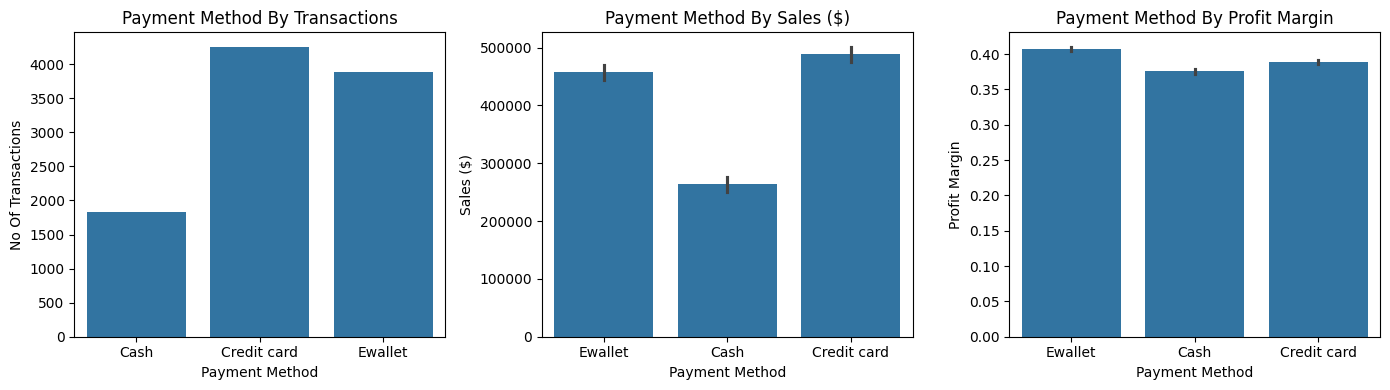

In [26]:
# Using Sub-Plot for Side by Side Comparision
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Payment Method By Transactions
trans_cnt = df.groupby('payment_method').agg(cnt = ('invoice_id','count'))
sns.barplot(x='payment_method',y='cnt', data = trans_cnt,ax=axes[0])
axes[0].set_title('Payment Method By Transactions')
axes[0].set_xlabel("Payment Method") 
axes[0].set_ylabel("No Of Transactions") 
 

# Payment Method By Sales
sns.barplot(x=df['payment_method'],y=df['sales'],estimator = sum,ax=axes[1])
axes[1].set_title('Payment Method By Sales ($)')
axes[1].set_xlabel("Payment Method") 
axes[1].set_ylabel("Sales ($)") 

# Payment Method By Profit Margin
sns.barplot(x=df['payment_method'],y=df['profit_margin'],ax=axes[2])
plt.title('Payment Method By Profit Margin')
plt.xlabel("Payment Method") 
plt.ylabel("Profit Margin") 

plt.tight_layout()
plt.show()

2. Analyse Product Category Performance By Sales & Profit Margin

    Fashion accessories & Home and Lifestyle consists of 80% of the total sales with fashion accessories leading by a slight difference. However, more sales doesn't imply more profit margin here as the profit margin is not significantly different across the categories. Food and Bevarages & Health and Beauty have a Profit Margin of 40% while other categories are slightly less profitable.

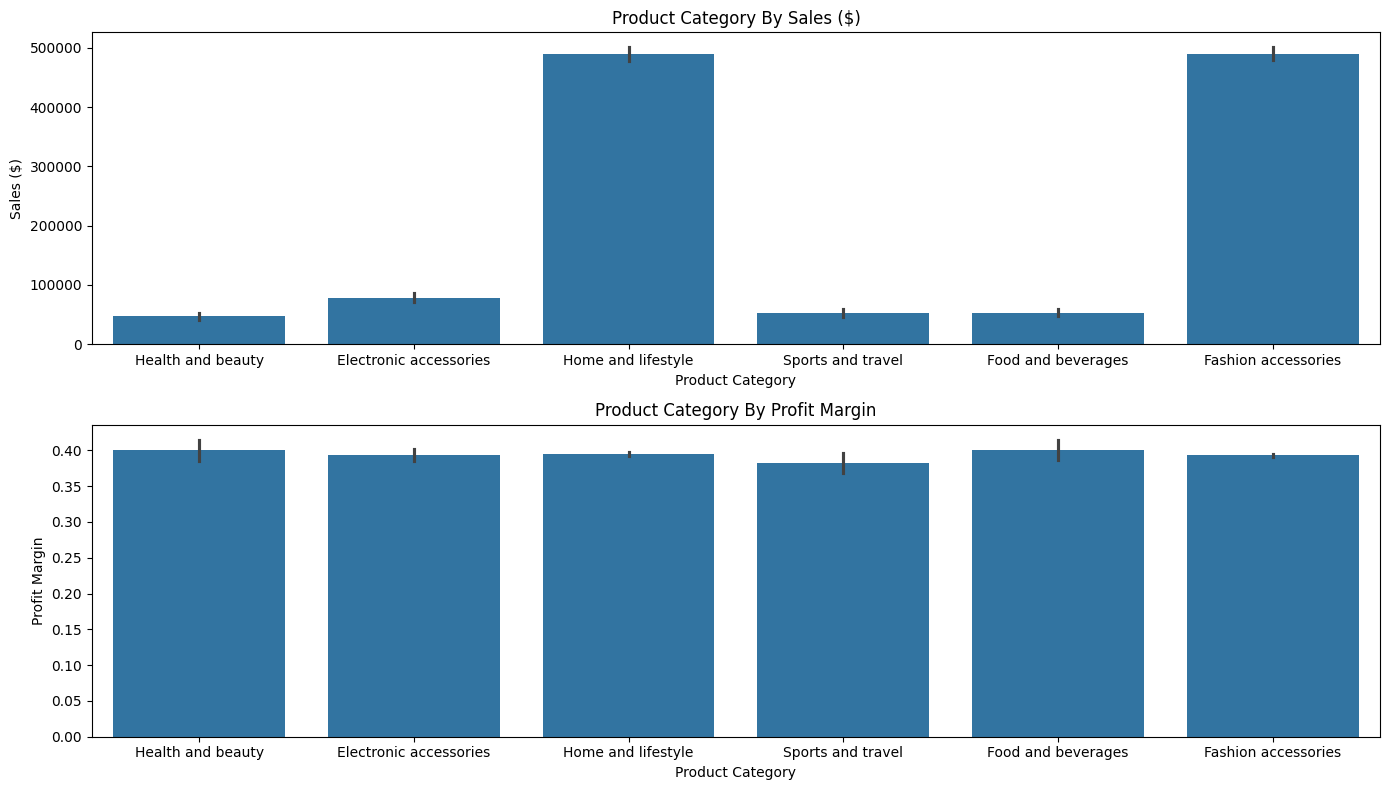

In [27]:
# Using Sub-Plot for Side by Side Comparision
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Product Category By Sales
sns.barplot(x=df['category'],y=df['sales'],estimator = sum,ax=axes[0])
axes[0].set_title('Product Category By Sales ($)')
axes[0].set_xlabel("Product Category") 
axes[0].set_ylabel("Sales ($)") 

# Product Category By Profit Margin
sns.barplot(x=df['category'],y=df['profit_margin'],ax=axes[1])
plt.title('Product Category By Profit Margin')
plt.xlabel("Product Category") 
plt.ylabel("Profit Margin") 

plt.tight_layout()
plt.show()

3. Analyse Average Rating by Product Category 

    Food and Bevarages & Health and Beauty have highest rating while Fashion accessories & Home and Lifestyle have lowest rating. 


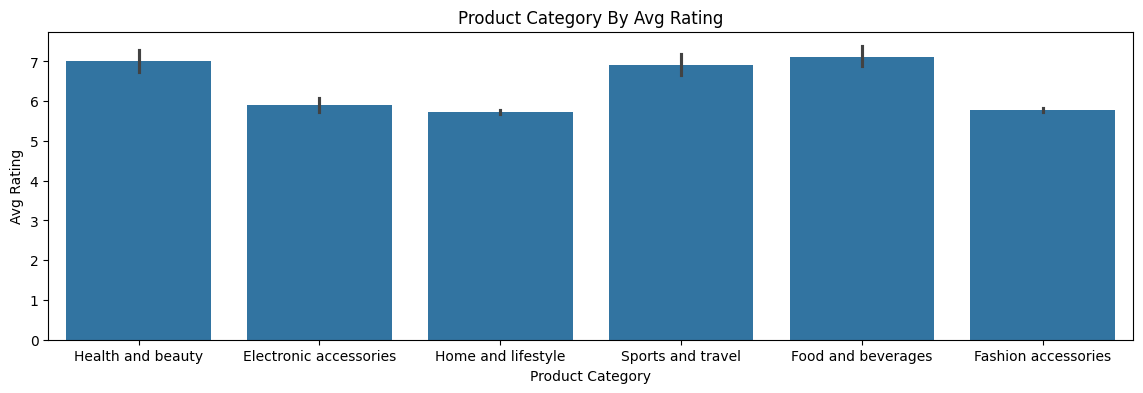

In [28]:
#Avg Rating By Product Category
fig = plt.figure(figsize=(14, 4))
sns.barplot(x=df['category'],y=df['rating'])
plt.title('Product Category By Avg Rating')
plt.xlabel("Product Category") 
plt.ylabel("Avg Rating") 
plt.show()

4. Analyse Correlation Between Sales Volume and Profit Margin 

    Sales and Profit Margin has a very weak negative correlation indicating almost no impact of sales on profit margin and vice versa.

5. Profitability and Customer Rating Correlation

    Sales, Profit Margin and Rating have very weak correlation among them indicating almost no impact of one on the other.





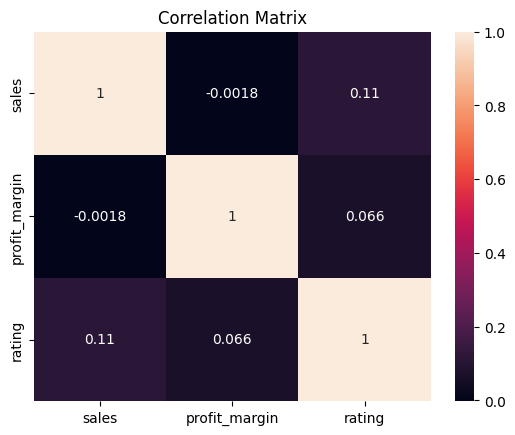

In [29]:
# Correlation between sales, profit margin & ratings
data = df[['sales','profit_margin','rating']]
sns.heatmap(
    data.corr(),
    annot=True   
    # cmap='coolwarm' 
)

plt.title('Correlation Matrix')
plt.show()

6. Analyse Sales and Profit Trends Over Time 

    Nov and Dec have the highest sales (more than double compared to the rest of the months) showing seasonality while July has the lowest sales.
    Profit margins does not show any major difference across the months.



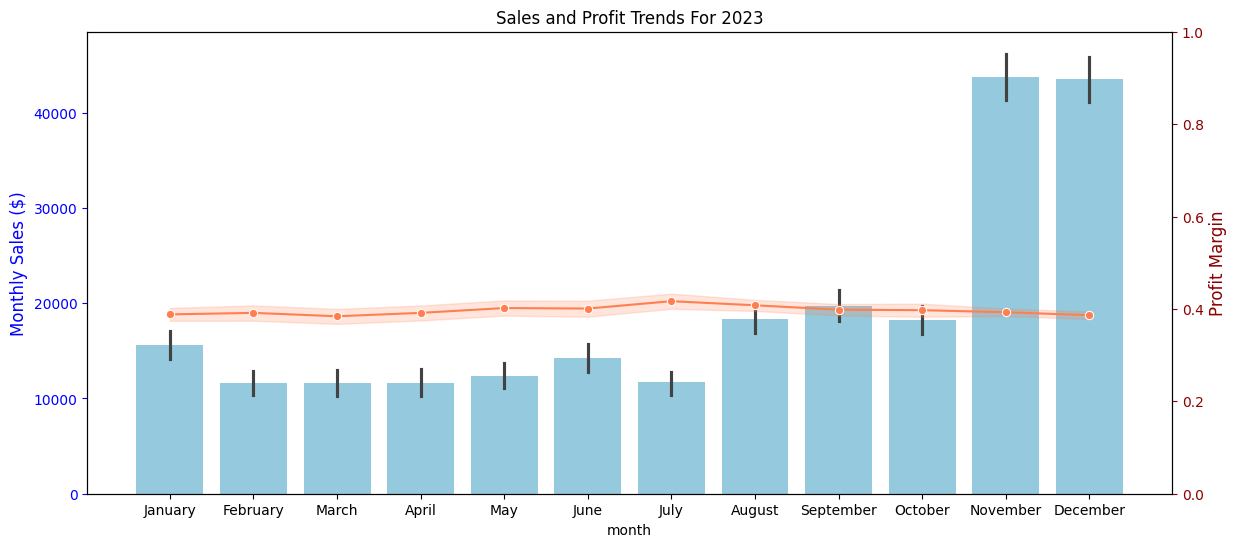

In [30]:
# Creating figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(14,6))

df1 = df[df['year'] == 2023].sort_values(by = 'date' )

# Barplot for Sales
sns.barplot(x='month', y='sales', data=df1, ax=ax1, color='skyblue', estimator = sum)
ax1.set_ylabel('Monthly Sales ($)', fontsize=12, color='blue')

# Creating secondary y-axis
ax2 = ax1.twinx()

# Lineplot for Profit Margin
sns.lineplot(x='month', y='profit_margin', data=df1, ax=ax2, color='coral', marker='o',estimator="mean")
ax2.set_ylabel('Profit Margin', fontsize=12, color='darkred')

# Adjust the scale of the secondary y-axis
ax2.set_ylim(0, 1)

# Change axis and tick colors to match the data plots
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('darkred')
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='darkred')

# Display the plot
plt.title('Sales and Profit Trends For 2023')
plt.show()

7. Weekly Sales Behavior Analysis

    Saturday has the highest sales while Monday has the lowest sales. Sales are slightly up on weekends compared to weekdays.

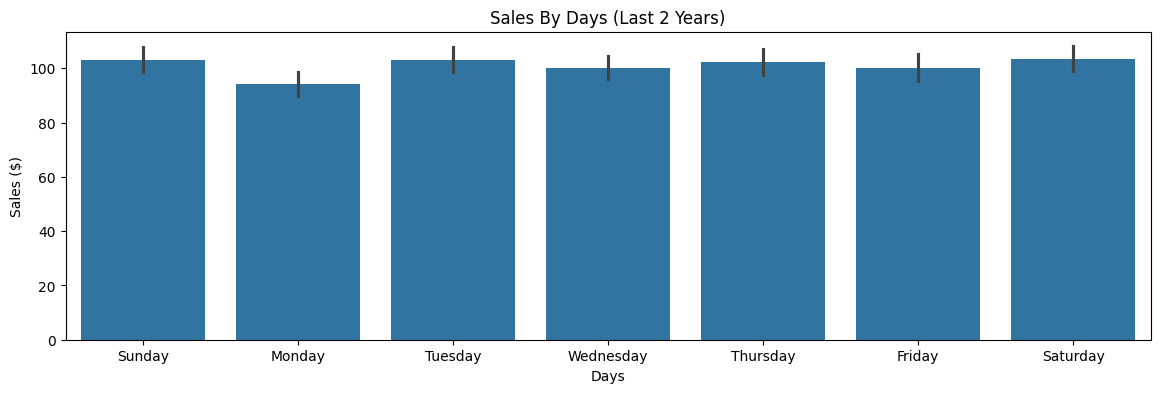

In [31]:
# Sales By Days (Last 2 Years)
fig = plt.figure(figsize=(14, 4))
df1 = df[(df['year'] == 2023) | (df['year'] == 2022)].sort_values(by = 'date' )
sns.barplot(x='day',y='sales',data = df1)
plt.title('Sales By Days (Last 2 Years)')
plt.xlabel("Days") 
plt.ylabel("Sales ($)") 
plt.show()

8. Peak Transaction Hour Analysis

    12pm to 6pm are Peak hours with highest no of transactions. Morning 6am to 12 pm have lowest no of transactions.

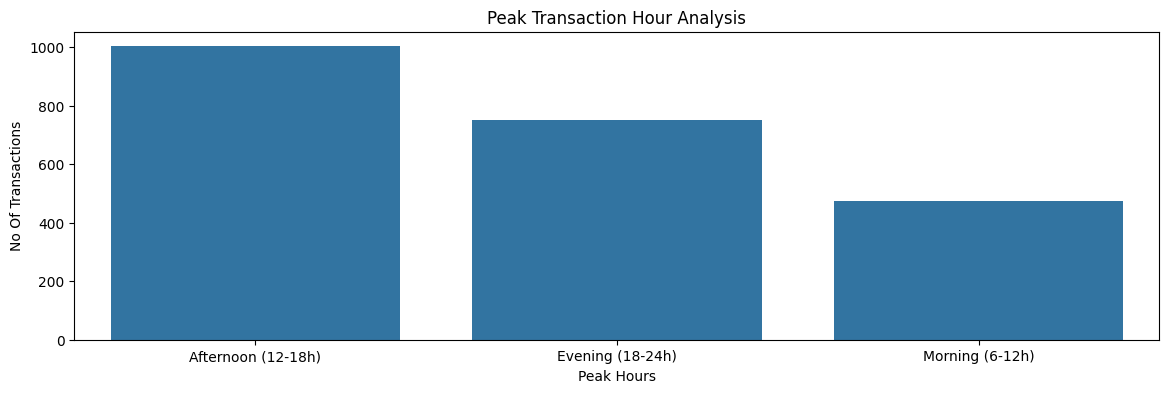

In [32]:
# Peak Hours By Transactions
fig = plt.figure(figsize=(14, 4))
df1 = df[df['year'] == 2023].sort_values(by = 'date' )
df1 = df1.groupby('time_bucket').agg(cnt = ('invoice_id','count')).reset_index()
sns.barplot(x='time_bucket',y='cnt',data = df1)
plt.title('Peak Transaction Hour Analysis')
plt.xlabel("Peak Hours") 
plt.ylabel("No Of Transactions") 
plt.show()

9. Analyse Branch and City Performance 

    Top Branch is WALM009 in City Weslaco with highest sales of $2600 and Profit Margin 48%.


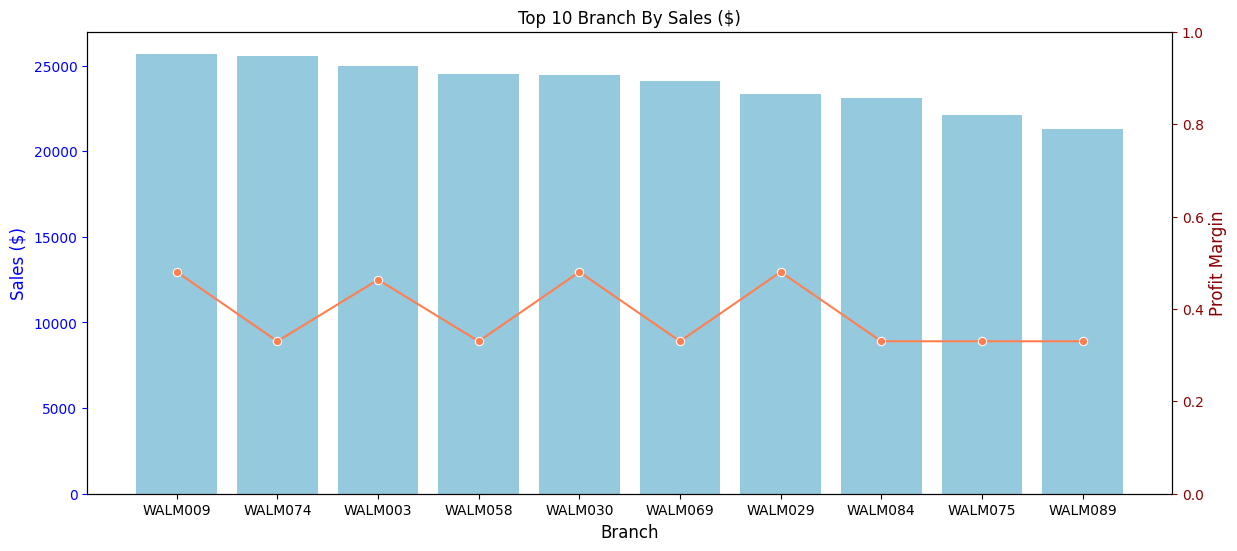

In [33]:
# Top 10 Branch By Sales & their Profit Margin

# Creating figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(14,6))

df1 = df.groupby('branch').agg(sales = ('sales','sum'), profit_margin = ('profit_margin','mean')).reset_index()
df1 = df1.sort_values(by = 'sales', ascending= False).head(10)

# Top 10 Branch By Sales
sns.barplot(x='branch', y='sales', data=df1, ax=ax1, color='skyblue')
ax1.set_xlabel('Branch', fontsize=12)
ax1.set_ylabel('Sales ($)', fontsize=12, color='blue')

# Creating secondary y-axis
ax2 = ax1.twinx()

# Top 10 Branch By Sales and their Profit Margin
sns.lineplot(x='branch', y='profit_margin', data=df1, ax=ax2, color='coral', marker='o', estimator = "mean")
ax2.set_xlabel('Branch', fontsize=12)
ax2.set_ylabel('Profit Margin', fontsize=12, color='darkred')

# Adjust the scale of the secondary y-axis
ax2.set_ylim(0, 1)

# Change axis and tick colors to match the data plots
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('darkred')
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='darkred')

# Display the plot
plt.title('Top 10 Branch By Sales ($)')
plt.show()

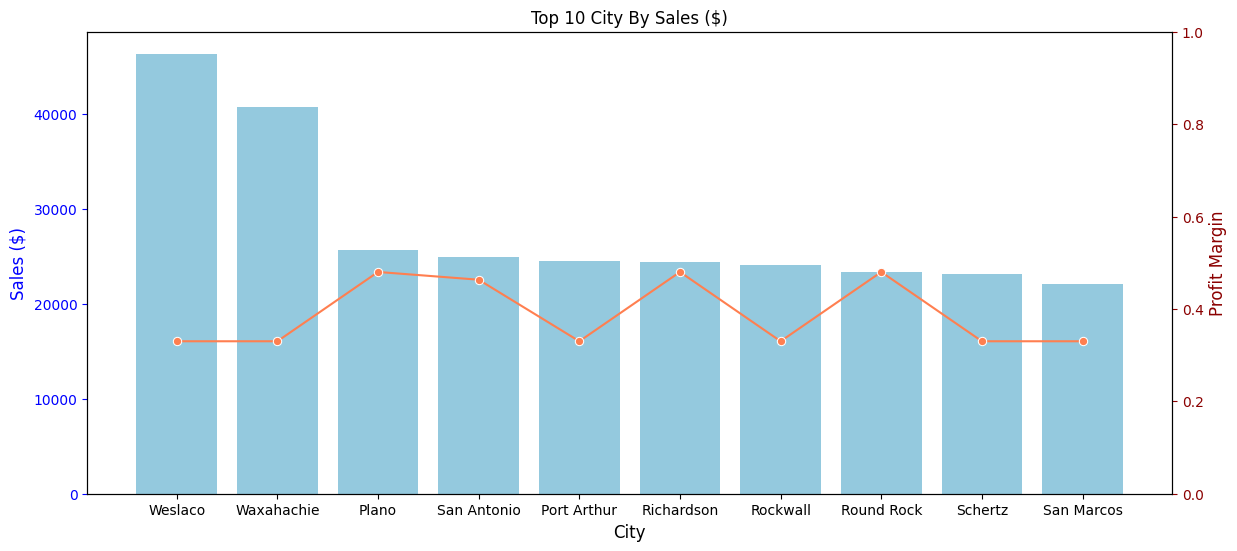

In [34]:
# Top 10 City By Sales & their Profit Margin

# Creating figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(14,6))

df1 = df.groupby('city').agg(sales = ('sales','sum'), profit_margin = ('profit_margin','mean')).reset_index()
df1 = df1.sort_values(by = 'sales', ascending= False).head(10)

# Top 10 City By Sales
sns.barplot(x='city', y='sales', data=df1, ax=ax1, color='skyblue')
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Sales ($)', fontsize=12, color='blue')

# Creating secondary y-axis
ax2 = ax1.twinx()

# Top 10 City By Sales and their Profit Margin
sns.lineplot(x='city', y='profit_margin', data=df1, ax=ax2, color='coral', marker='o', estimator = "mean")
ax2.set_xlabel('City', fontsize=12)
ax2.set_ylabel('Profit Margin', fontsize=12, color='darkred')

# Adjust the scale of the secondary y-axis
ax2.set_ylim(0, 1)

# Change axis and tick colors to match the data plots
ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('darkred')
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='darkred')

# Display the plot
plt.title('Top 10 City By Sales ($)')
plt.show()

# Loading Table into SQL

In this step, pymysql connector was used for connecting to MySQL database and a table was created for storing the data, which is used for Power BI dashboard development.

In [35]:
# Connecting to MySQL using pymysql connector
engine_mysql = create_engine("mysql+pymysql://root:@localhost:3306/Retail_Sales_db")

try:
    engine_mysql
    print("Connection Successed to mysql")
except:
    print("Unable to connect")

Connection Successed to mysql


In [36]:
# Creating table in SQL
df.to_sql(name='Retail Sales', con=engine_mysql, if_exists='append', index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_13252\3123415824.py:2: UserWarning: The provided table name 'Retail Sales' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql(name='Retail Sales', con=engine_mysql, if_exists='append', index=False)


9969

# Results and Insights

1. Analysed Payment Methods  - Credit card is the most preferred payment method with the highest no of transactions and sales but e-wallet has slightly more profit margin than credit card. Cash is the least preferred payment method.

2. Analysed Product Category Performance - Fashion accessories & Home and Lifestyle consists of 80% of the total sales with fashion accessories leading by a slight difference. However, more sales doesn't imply more profit margin here as the profit margin is not significantly different across the categories. Food and Bevarages & Health and Beauty have a Profit Margin of 40% while other categories are slightly less profitable.

3. Analysed Average Rating by Category - Food and Bevarages & Health and Beauty have highest rating while Fashion accessories & Home and Lifestyle have lowest rating. 

4. Analyse Correlation Between Sales Volume and Profit Margin - Sales and Profit Margin has a very weak negative correlation indicating almost no impact of sales on profit margin and vice versa.

5. Profitability and Customer Rating Correlation - Sales, Profit Margin and Rating have very weak correlation among them indicating almost no impact of one on the other.

6. Analyse Sales and Profit Trends Over Time - Nov and Dec have the highest sales (more than double compared to the rest of the months) showing seasonality. Profit margins does not show any major difference across the months.

7. Weekly Sales Behavior Analysis - Saturday has the highest sales while Monday has the lowest sales. Sales are slightly up on weekends compared to weekdays.

8. Peak Transaction Hour Analysis - 12pm to 6pm are Peak hours with highest no of transactions. Morning 6am to 12 pm have lowest no of transactions.

9. Analyse Branch and City Performance - Top Branch is WALM009 in City Weslaco with highest sales of $2600 and Profit Margin 48%.